# Least Squares Models

In [61]:
%matplotlib inline
import numpy as np
from cross_validation import cross_validation
from polynomial import build_poly
import matplotlib.pyplot as plt

In [45]:
X_train = np.load("X_train.npy")
y_train = np.load("y_train_1-1.npy")
print(X_train.shape)
print(y_train.shape)

(250000, 13)
(250000,)


# Splitting into 4 classifiers

We split the dataset using PRI_jet_num column

In [46]:
X_pri_0 = X_train[(X_train[:, -1] == 0),:-1]
X_pri_1 = X_train[(X_train[:, -1] == 1),:-1]
X_pri_2 = X_train[(X_train[:, -1] == 2),:-1]
X_pri_3 = X_train[(X_train[:, -1] == 3),:-1]
y_pri_0 = y_train[(X_train[:, -1] == 0)]
y_pri_1 = y_train[(X_train[:, -1] == 1)]
y_pri_2 = y_train[(X_train[:, -1] == 2)]
y_pri_3 = y_train[(X_train[:, -1] == 3)]

In [47]:
print("PRI_0: {}".format(X_pri_0.shape))
print("PRI_1: {}".format(X_pri_1.shape))
print("PRI_2: {}".format(X_pri_2.shape))
print("PRI_3: {}".format(X_pri_3.shape))

print("y_PRI_0: {}".format(y_pri_0.shape))
print("y_PRI_1: {}".format(y_pri_1.shape))
print("y_PRI_2: {}".format(y_pri_2.shape))
print("y_PRI_3: {}".format(y_pri_3.shape))

PRI_0: (99913, 12)
PRI_1: (77544, 12)
PRI_2: (50379, 12)
PRI_3: (22164, 12)
y_PRI_0: (99913,)
y_PRI_1: (77544,)
y_PRI_2: (50379,)
y_PRI_3: (22164,)


In [48]:
selected_features = np.array([1,3,9,10,11,13,21,22])
selected_features = np.sort(np.append(selected_features, [0,4,5,6,12]))
print(selected_features)

[ 0  1  3  4  5  6  9 10 11 12 13 21 22]


In [49]:
delete_columns = []

for i in range(X_pri_0.shape[1]):
    if np.isin(True, (X_pri_0[:,i] == -999)):
        delete_columns.append(i)
        
delete_columns

[3, 4, 5, 9]

In [50]:
X_pri_0 = np.delete(X_pri_0, np.s_[delete_columns], axis=1)  
X_pri_0.shape

(99913, 8)

In [51]:
X_pri_1 = np.delete(X_pri_1, np.s_[delete_columns], axis=1)  
X_pri_1.shape

(77544, 8)

In [52]:
print("PRI_0: {}".format(X_pri_0.shape))
print("PRI_1: {}".format(X_pri_1.shape))
print("PRI_2: {}".format(X_pri_2.shape))
print("PRI_3: {}".format(X_pri_3.shape))

PRI_0: (99913, 8)
PRI_1: (77544, 8)
PRI_2: (50379, 12)
PRI_3: (22164, 12)


# Least Squares Models for 4 subsets

## Add polynomial features

In [53]:
degrees = np.linspace(2,10,9).astype(int)
degrees

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10])

## Rank deficiency test for polynomial features

In [11]:
def rank_deficiency(degrees, X):
    for degree in degrees:
        created = build_poly(pri_2, degree)
        if created.shape[1] != np.linalg.matrix_rank(created):
            return True
    return False

In [54]:
print("PRI_0: {}".format(rank_deficiency(degrees, X_pri_0)))
print("PRI_1: {}".format(rank_deficiency(degrees, X_pri_1)))
print("PRI_2: {}".format(rank_deficiency(degrees, X_pri_2)))
print("PRI_3: {}".format(rank_deficiency(degrees, X_pri_3)))

PRI_0: False
PRI_1: False
PRI_2: False
PRI_3: False


## Model training

### Training for PRI_0 subset

Optimum degree = 10

In [85]:
sum(y_pri_0 == 1)

25492

In [56]:
pars = {'degrees': degrees}
pri0_tr_acc, pri1_te_acc = cross_validation(y_pri_0, X_pri_0, 5, h_pars=pars, model='least')

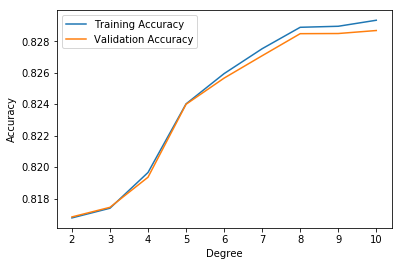

In [67]:
plt.plot(pri0_tr_acc[:,0], pri0_tr_acc[:,1], label='Training Accuracy')
plt.plot(pri1_te_acc[:,0], pri1_te_acc[:,1], label='Validation Accuracy')
plt.xlabel('Degree')
plt.ylabel('Accuracy')
plt.legend()

### Training for PRI_1 subset

Optimum degree = 9

In [68]:
pri1_tr_acc, pri1_te_acc = cross_validation(y_pri_1, X_pri_1, 5, h_pars=pars, model='least')

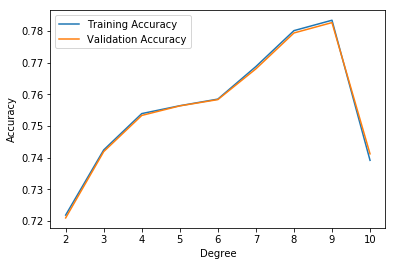

In [71]:
plt.plot(pri1_tr_acc[:,0], pri1_tr_acc[:,1], label='Training Accuracy')
plt.plot(pri1_te_acc[:,0], pri1_te_acc[:,1], label='Validation Accuracy')
plt.xlabel('Degree')
plt.ylabel('Accuracy')
plt.legend()

### Training for PRI_2 subset

Optimum degree = 8

In [72]:
pri1_tr_acc, pri1_te_acc = cross_validation(y_pri_2, X_pri_2, 5, h_pars=pars, model='least')

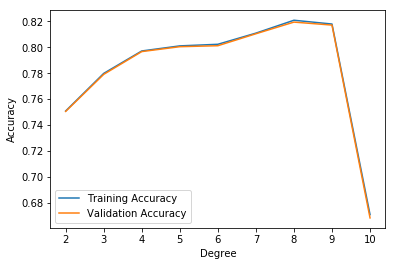

In [75]:
plt.plot(pri1_tr_acc[:,0], pri1_tr_acc[:,1], label='Training Accuracy')
plt.plot(pri1_te_acc[:,0], pri1_te_acc[:,1], label='Validation Accuracy')
plt.xlabel('Degree')
plt.ylabel('Accuracy')
plt.legend()

### Training for PRI_3 subset

Optimum degree = 8

In [76]:
pri3_tr_acc, pri3_te_acc = cross_validation(y_pri_3, X_pri_3, 5, h_pars=pars, model='least')

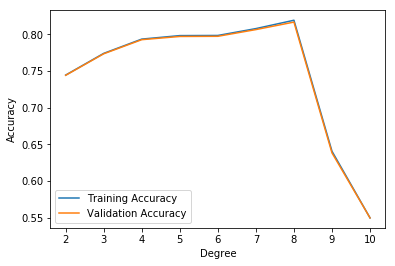

In [77]:
plt.plot(pri3_tr_acc[:,0], pri3_tr_acc[:,1], label='Training Accuracy')
plt.plot(pri3_te_acc[:,0], pri3_te_acc[:,1], label='Validation Accuracy')
plt.xlabel('Degree')
plt.ylabel('Accuracy')
plt.legend()